In [1]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
data_path = "archive.zip"

with zipfile.ZipFile(data_path, 'r') as zip_ref:
    zip_ref.extractall()
print("Dataset extracted successfully!")

In [2]:
train_dir = "training_set/training_set"
test_dir = "test_set/test_set"

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode="binary"
)

Found 8005 images belonging to 2 classes.


In [6]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode="binary"
)

Found 2023 images belonging to 2 classes.


In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")  # binary classification
])

C:\Users\Dell\anaconda3\envs\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,   # depends on dataset size
    epochs=10,
    validation_data=test_generator,
    validation_steps=50
)

C:\Users\Dell\anaconda3\envs\myenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4997 - loss: 0.8648

C:\Users\Dell\anaconda3\envs\myenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0.5009 - loss: 0.7360 - val_accuracy: 0.4963 - val_loss: 0.6954
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.5481 - loss: 0.6864 - val_accuracy: 0.5556 - val_loss: 0.6764
Epoch 3/10
 51/100 ━━━━━━━━━━━━━━━━━━━━ 40s 823ms/step - accuracy: 0.5324 - loss: 0.6841

C:\Users\Dell\anaconda3\envs\myenv\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 51s 509ms/step - accuracy: 0.5490 - loss: 0.6861 - val_accuracy: 0.5825 - val_loss: 0.6773
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 90s 898ms/step - accuracy: 0.5878 - loss: 0.6778 - val_accuracy: 0.5700 - val_loss: 0.6699
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 82s 819ms/step - accuracy: 0.5819 - loss: 0.6692 - val_accuracy: 0.6300 - val_loss: 0.6455
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 44s 443ms/step - accuracy: 0.6036 - loss: 0.6650 - val_accuracy: 0.6162 - val_loss: 0.6398
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 73s 730ms/step - accuracy: 0.6016 - loss: 0.6676 - val_accuracy: 0.6500 - val_loss: 0.6432
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 71s 712ms/step - accuracy: 0.6205 - loss: 0.6487 - val_accuracy: 0.6562 - val_loss: 0.6298
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 390ms/step - accuracy: 0.6256 - loss: 0.6373 - val_accuracy: 0.6800 - val_loss: 0.5950
Epoch 10/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 71s 709ms/step - accuracy: 0.6354 - loss: 0.6339 - va

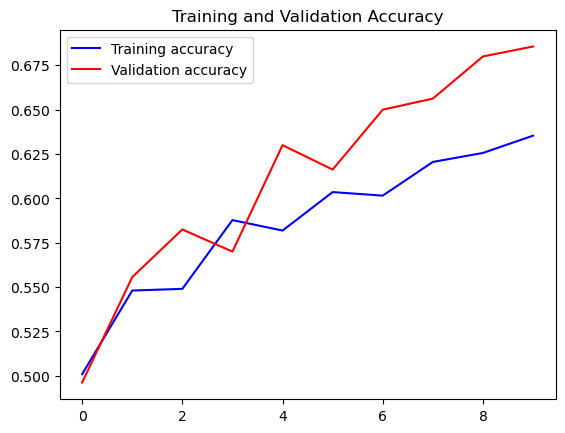

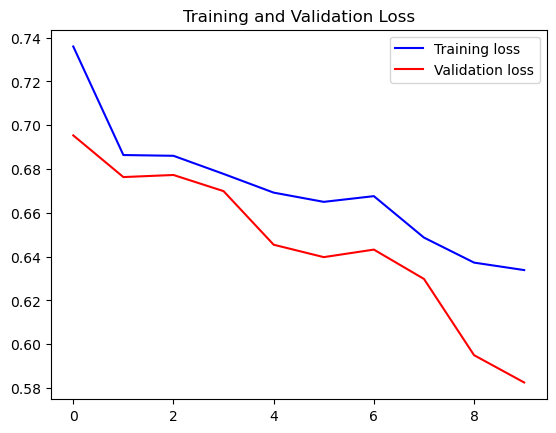

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, "b", label="Training accuracy")
plt.plot(epochs, val_acc, "r", label="Validation accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "b", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load a test image (change path to your own image)
img_path = "test_set/test_set/cats/cat.4001.jpg"  
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Predict
prediction = model.predict(img_array)[0][0]  # model outputs probability for "dog"

# Apply threshold
if prediction > 0.7:        # confident it's a dog
    print("It's a Dog ")
elif prediction < 0.3:      # confident it's a cat
    print("It's a Cat ")
else:                       # not confident → reject
    print("Not a cat or dog ")